
# **Do Caos ao dado confiável - Como Python ajuda a construir pipelines inteligentes**
# *** Por: Fabricio Machado ***




#Breve Histórico

#Anos 1970–1980: Origem dos Bancos de Dados Relacionais

1970: Edgar F. Codd (IBM) publica o artigo “A Relational Model of Data for Large Shared Data Banks”, criando o conceito de banco de dados relacional (RDBMS).

1974–1980: Surgem os primeiros SGBDs relacionais: System R (IBM), Ingres, Oracle e DB2.

A modelagem relacional se consolida com o uso de tabelas normalizadas, chaves primárias e estrangeiras e a linguagem SQL (Structured Query Language).

#🗃️ Anos 1990: BI e Modelagem Dimensional

1990–1996: Bill Inmon e Ralph Kimball difundem a arquitetura de Data Warehouse (DW).

Inmon: abordagem top-down, DW corporativo e data marts.

Kimball: abordagem bottom-up, modelo dimensional com fatos e dimensões.

ETL (Extract, Transform, Load) torna-se o padrão para preparar dados analíticos.

Surgem ferramentas de BI como Cognos, Business Objects, MicroStrategy.

#🐍 Anos 2000: Popularização de Python e Automação de Dados

Python se torna popular em ciência de dados graças à sua facilidade de uso e bibliotecas como NumPy e Pandas.

Bancos como MySQL, PostgreSQL e SQL Server se consolidam no mercado.

Ferramentas de BI evoluem: Tableau, QlikView, Power BI (2015).

Cresce o uso de scripts Python para automatizar ETLs, análise estatística e integração com APIs.

#☁️ Anos 2010: Big Data, Hadoop e Spark

2006–2010: A explosão de dados leva ao conceito de Big Data e ao surgimento do Hadoop (MapReduce, HDFS).

2013: O Apache Spark revoluciona o processamento distribuído com in-memory computation, PySpark e APIs unificadas para SQL, streaming e machine learning.

Bancos NoSQL (MongoDB, Cassandra, HBase) ganham espaço para dados não estruturados.

Plataformas de nuvem (AWS, Azure, GCP) passam a oferecer serviços gerenciados de Big Data e DW (BigQuery, Synapse, Redshift, Databricks).

Python + Spark + SQL tornam-se o trio dominante para engenharia de dados moderna.

#🧠 Anos 2020–2025: Data Lakehouse, BI Unificado e IA

O conceito de Lakehouse (Databricks, Delta Lake, Microsoft Fabric, Snowflake) une o Data Lake e o Data Warehouse.

Modelos dimensionais híbridos convivem com tabelas Parquet, Delta, Iceberg, e catálogos unificados.

Power BI se integra nativamente a Lakehouses e Semantic Models (Fabric).

PySpark, dbt, Airflow, Fabric Dataflows Gen2 e notebooks Python impulsionam pipelines de dados low-code e governados.

Python continua como a principal linguagem para engenharia de dados, ML e automação, agora com suporte a IA generativa (Copilot, GPTs).

Governança e qualidade de dados passam a ser centrais — com Purview, Unity Catalog, Data Quality Scans e Data Products.

#🚀 Hoje (2025): O Ecossistema Integrado

Atualmente, a engenharia e a análise de dados convergem em um ecossistema unificado:

Camada	Tecnologia	Papel Principal
Ingestão	Data Factory, Dataflow Gen2, Airbyte	Extração e carga de dados
Armazenamento	Delta Lake, Parquet, SQL, Fabric Lakehouse	Persistência e versionamento
Processamento	Spark, PySpark, SQL, Fabric Pipelines	ETL/ELT e enriquecimento
Modelagem	Dimensional (Fato/Dimensão), Medallion (Bronze/Silver/Gold)	Organização lógica dos dados
Consumo	Power BI, Fabric Semantic Model, APIs	Visualização e consumo
Governança	Microsoft Purview, Unity Catalog	Metadados, lineage e compliance


# 🎯 Objetivo Geral

Demonstrar **como o Python e o PySpark ajudam a construir pipelines de dados inteligentes** no **Databricks**, aplicando boas práticas de engenharia e governança em um fluxo completo — da *Landing (Bronze)* até a *Gold* — dentro do modelo **Medallion Architecture**.

A proposta é mostrar, de forma prática e didática, como o uso de Python permite:
- gerar, tratar e normalizar dados de forma flexível;
- criar pipelines reprocessáveis e automatizáveis;
- integrar limpeza, padronização e modelagem analítica em um só ambiente.

---

# 🧱 Estrutura da Solução — O Modelo Medallion

A arquitetura segue o **modelo Medallion**, proposto pela **Databricks** para organizar os dados em camadas evolutivas.  
Ela define uma trilha natural de *maturidade e refinamento* dos dados:

| Camada | Nome | Função | Exemplo |
|:--|:--|:--|:--|
| 🥉 Bronze | **Landing / Raw** | Armazena dados brutos, sem transformação. | `landing_zone_finance` |
| 🥈 Silver | **Refined / Clean** | Normaliza formatos, corrige inconsistências e deduplica. | `silver_finance` |
| 🥇 Gold | **Curated / Analytics** | Estrutura em **fatos e dimensões** (modelo estrela) para análise. | `fato_precos`, `dim_ticker` |

Cada camada tem propósito próprio e clara separação de responsabilidades — o que facilita **reprocessamento, auditoria, versionamento e governança**.

---

# 🌊 O Surgimento dos Lakehouses e o Papel no ETL

Antes dos *Lakehouses*, havia duas abordagens dominantes:
1. **Data Warehouses (DW)** – estruturas relacionais, rígidas e caras, ideais para BI, mas pouco flexíveis para grandes volumes e dados semiestruturados.
2. **Data Lakes** – repositórios baratos e escaláveis (HDFS, S3, ADLS), mas sem controle de esquema, governança e performance analítica.

Com o tempo, essas abordagens se **fundiram** em um novo conceito: o **Lakehouse**.

> 💡 **Lakehouse = Data Lake + Data Warehouse**

Ele combina o melhor dos dois mundos:
- Armazena dados **em formato aberto (Parquet/Delta)** no *data lake*;
- Garante **transações ACID**, **controle de schema** e **índices otimizados**;
- Permite **query SQL, governança e versionamento** sobre o mesmo dado bruto.

O **Delta Lake**, tecnologia base do Databricks, é o coração dessa ideia.  
Ele permite que o pipeline ETL/ELT seja implementado de ponta a ponta **sem precisar mover dados para outro ambiente**.

Em outras palavras:
> O Lakehouse é o *habitat natural* do modelo Medallion — onde o ETL nasce, evolui e entrega valor sem fricção.

---

# 🐍 Por que o Python é importante neste caso

O **Python** é o motor da flexibilidade e automação em um Lakehouse moderno.  
Ele é essencial aqui por três motivos:

1. **Integração total com o Spark**  
   - O **PySpark** permite processar dados massivos em clusters distribuídos, com a simplicidade e poder expressivo do Python.

2. **Versatilidade na transformação e análise**  
   - Criação de funções de parsing, limpeza, padronização e deduplicação;  
   - Integração com APIs externas (ex.: Yahoo Finance, APIs REST, arquivos JSON/CSV);  
   - Mescla de **engenharia + análise + automação** em um único ambiente.

3. **Automação e reprodutibilidade**  
   - Notebooks versionáveis;  
   - Pipelines parametrizados;  
   - Deploy simplificado para **Delta Live Tables (DLT)**, **Jobs** e **Workflows**.

> Em resumo: o Python é a “cola” que une engenharia, ciência e governança dentro do Databricks.

---

# 🧩 Modelagem de Dados — Star Schema

Na camada Gold, os dados são organizados em **Fatos** e **Dimensões**, dentro do modelo **estrela (Star Schema)** — a base dos ambientes analíticos desde os anos 1990.

### Estrutura simplificada:


In [0]:
#################################################
##         dim_date
##           │
##           │
## dim_ticker ├──▶ fato_precos ◀── dim_exchange
## │ │
## │ └──▶ fato_marketcap
## └──▶ dim_currency


 


### Breve histórico
O **modelo dimensional** foi proposto por **Ralph Kimball** na década de 1990, como alternativa prática ao modelo corporativo normalizado de **Bill Inmon**.

| Abordagem | Criador | Foco | Características |
|:--|:--|:--|:--|
| **Inmon (Top-Down)** | Bill Inmon | Data Warehouse corporativo | Estrutura normalizada, integração total, maior rigidez |
| **Kimball (Bottom-Up)** | Ralph Kimball | Data Marts departamentais | Estrutura dimensional (fatos e dimensões), fácil para BI |

Com o advento dos **Data Lakes** e posteriormente dos **Lakehouses**, o **Star Schema** evoluiu, sendo recriado sobre **tabelas Delta**, mantendo:
- Performance analítica (colunar, otimizável);
- Transações ACID e versionamento;
- Facilidade de integração com Power BI, Fabric e ferramentas SQL.

---

# 🧠 Em resumo

> O pipeline combina **engenharia robusta (PySpark)**, **governança estruturada (Medallion)** e **modelagem inteligente (Star Schema)** sobre um **Lakehouse moderno**, criando uma fundação sólida para BI, análise avançada e aprendizado de máquina.



%md
# 🗓️ Agenda Rápida

1️⃣ **Setup e dependências**  
Configuração inicial do ambiente no Databricks Community, bibliotecas e preparação do contexto PySpark.

2️⃣ **Landing (Bronze)**  
Ingestão de **cotações financeiras** a partir do **Yahoo Finance**, com fallback sintético.  
> Mostra como construir dados realistas e intencionalmente “sujos” para simular o mundo real.

3️⃣ **Silver (Refined)**  
Normalização e padronização de dados:  
- limpeza de formatos (datas, moedas, strings);  
- conversão de tipos e correção de outliers;  
- cálculo de retornos diários e criação da coluna `data_criacao`.

4️⃣ **Gold (Curated)**  
Separação da Silver em:  
- **Fatos** (`fato_precos`, `fato_marketcap`);  
- **Dimensões** (`dim_ticker`, `dim_date`, `dim_currency`, `dim_exchange`);  
- Criação de métricas derivadas (médias móveis e volatilidade).

5️⃣ **Anomalias e Insights**  
Detecção de **anomalias de variação de preço (z-score)** e análise exploratória.  
> Demonstra como o Python permite estender um pipeline de ETL para Data Science.

6️⃣ **Consultas e Visualizações (BI)**  
Execução de consultas SQL e geração de gráficos (Matplotlib) para simular dashboards.  
> Mostra a transição natural do **ETL → Analytics**, e os próximos passos com **Jobs e Workflows** no Databricks.

---

🎯 **Objetivo:**  
Apresentar de ponta a ponta como **Python + PySpark + Delta Lake** formam a base de um **pipeline inteligente**, confiável e analítico — no formato **Medallion / Lakehouse**, com modelagem **Star Schema**.



In [0]:

# ╔══════════════════════════════════════════════════════════════╗
# ║ 1) SETUP: nomes de tabelas e caminhos                        ║
# ╚══════════════════════════════════════════════════════════════╝

from pyspark.sql import functions as F
from pyspark.sql import Window
from pyspark.sql import types as T

base_path = "dbfs:/FileStore/finance_pipeline"

landing_tbl = "landing_zone_finance"
silver_tbl  = "silver_finance"
gold_fact   = "fato_precos"
gold_dim_tk = "dim_ticker"
gold_dim_dt = "dim_date"
gold_feat   = "gold_features_finance"
gold_anom   = "gold_anomalias_finance"

print("Base path:", base_path)


Base path: dbfs:/FileStore/finance_pipeline





# 📦 Landing Zone (Geração Sintética “Suja” — PySpark)

## Objetivo
Criar uma **camada RAW/Landing** realista para demonstrações e testes de pipelines **Medallion (Bronze/Silver/Gold)** usando **apenas PySpark** (sem internet ou libs externas).  
A landing simula **cotações financeiras** e injeta **inconsistências intencionais** para que a **Silver** tenha o que normalizar.

---

## O que este código faz
- **Gera 90 dias úteis** recentes (Seg–Sex) a partir da data atual.
- Cria **séries de preços** por ticker via *random walk* (retorno ~ N(0,08%, 2%)):
  - `open`, `high`, `low`, `close`, `adj_close`, `volume`.
- Atribui **metadados do ativo**: `company_name`, `isin`, `sector`, `industry`, `exchange`, `currency`, `country`, `shares_outstanding`.
- Calcula **métricas derivadas**: `market_cap`.
- **Sujeira proposital** (colunas `raw_*`) para normalização na Silver:
  - `raw_ticker` com variação de caixa/espacos/“.SA” ausente;  
  - `raw_sector`, `raw_currency`, `raw_exchange`, `raw_country` com typos/variações;  
  - `raw_volume` como **string** com separadores;  
  - `raw_close_str` como **string** (às vezes vírgula decimal);  
  - `raw_date_str` em formatos variados (`dd/MM/yyyy`, `yyyy-MM-dd`, `MM-dd-yyyy`);  
  - `raw_close_maybe_neg` (outliers negativos ocasionais), `raw_volume_maybe_null` (nulos raros);  
  - `raw_company_name` com espaços extras.
- Carimba `_ingest_ts` para **deduplicação** posterior na Silver.
- Salva tudo como tabela Delta: **`landing_zone_finance`** (nomes de colunas em *snake_case* e válidos para Delta).




In [0]:
# ╔══════════════════════════════════════════════════════════════╗
# ║ Landing — geração sintética “suja” (versão segura)           ║
# ╚══════════════════════════════════════════════════════════════╝
from pyspark.sql import functions as F
from pyspark.sql.window import Window

landing_tbl = "landing_zone_finance"

# --- Metadados por ticker ---
meta_rows = [
    ("^BVSP",    "Ibovespa Index",     None,            "Energy",      "Benchmark",            "B3", "BRL", "BR",      0),
    ("PETR4.SA", "Petrobras PN",       "BRPETRACNPR6",  "Energy",      "Oil & Gas",            "B3", "BRL", "BR", 13050000000),
    ("VALE3.SA", "Vale ON",            "BRVALEACNOR0",  "Materials",   "Metals & Mining",      "B3", "BRL", "BR",  4500000000),
    ("ITUB4.SA", "Itaú Unibanco PN",   "BRITUBACNPR1",  "Financials",  "Banks",                "B3", "BRL", "BR", 10400000000),
    ("WEGE3.SA", "WEG ON",             "BRWEGEACNOR0",  "Industrials", "Electrical Equipment", "B3", "BRL", "BR",  4200000000),
]
df_meta = spark.createDataFrame(
    meta_rows,
    ["ticker","company_name","isin","sector","industry","exchange","currency","country","shares_outstanding"]
)

# --- Datas: 90 dias úteis recentes ---
dates = (
    spark.range(0, 180)
    .select(
        F.date_add(
            F.date_sub(F.current_date(), F.lit(179)),     # start
            F.col("id").cast("int")                       # add id days (INT)
        ).alias("d")
    )
    .filter(F.dayofweek(F.col("d")).between(2, 6))        # Mon..Fri
    .orderBy(F.col("d"))
    .withColumn("trade_date", F.to_timestamp(F.col("d")))
    .drop("d")
)

w_last = Window.partitionBy(F.lit(1)).orderBy(F.col("trade_date").desc())
dates90 = (
    dates.withColumn("rn", F.row_number().over(w_last))
         .filter(F.col("rn") <= 90)
         .drop("rn")
         .orderBy(F.col("trade_date"))
)

# --- Série sintética por ticker ---
w_tt = Window.partitionBy(F.col("ticker")).orderBy(F.col("trade_date")) \
             .rowsBetween(Window.unboundedPreceding, Window.currentRow)

grid = (
  df_meta.crossJoin(dates90)
  .withColumn("ret", F.randn(42)*F.lit(0.02) + F.lit(0.0008))
  .withColumn("log_growth", F.log1p(F.col("ret")))
  .withColumn("cum_log_growth", F.sum(F.col("log_growth")).over(w_tt))
  .withColumn("base_price", (F.pmod(F.abs(F.hash(F.col("ticker"))), F.lit(90)) + F.lit(30)).cast("double"))
  .withColumn("close",  F.round(F.col("base_price") * F.exp(F.col("cum_log_growth")), 2))
  .withColumn("open",   F.round(F.col("close") * (F.lit(1) + F.randn(1234)*F.lit(0.003)), 2))
  .withColumn("high",   F.round(F.greatest(F.col("open"), F.col("close")) * (F.lit(1) + F.abs(F.randn(567)*F.lit(0.003))), 2))
  .withColumn("low",    F.round(F.least(F.col("open"), F.col("close"))  * (F.lit(1) - F.abs(F.randn(890)*F.lit(0.003))), 2))
  .withColumn("adj_close", F.col("close"))
  .withColumn("vol_base", (F.pmod(F.abs(F.hash(F.concat_ws('_', F.col("ticker")))), F.lit(3))*F.lit(1e6) + F.lit(3e6)).cast("double"))
  .withColumn("volume", F.abs((F.randn(7)*F.lit(1.5e6)) + F.col("vol_base")).cast("long"))
  .withColumn("market_cap", (F.col("close") * F.col("shares_outstanding")).cast("double"))
)

# --- Sujeiras intencionais (SEM usar expr / strings soltas) ---
# ajudantes para “sujar” valores sem expr
def maybe(val_if_true, val_if_false, p, seed):
    return F.when(F.rand(seed) < F.lit(p), val_if_true).otherwise(val_if_false)

grid = (
  grid
  # raw_ticker: variações em caixa/espaços/falta .SA (sem expr)
  .withColumn("raw_ticker",
      F.when(F.col("ticker")=="PETR4.SA",
             maybe(F.lit("petr4.sa"),
                   maybe(F.lit("PETR4"), F.lit(" PETR4.SA "), F.lit(0.5), 2),
                   F.lit(0.33), 1))
       .when(F.col("ticker")=="VALE3.SA",
             maybe(F.lit("VALE3"), F.lit("vale3.sa"), F.lit(0.5), 3))
       .when(F.col("ticker")=="ITUB4.SA", F.lit("  itub4.SA"))
       .when(F.col("ticker")=="WEGE3.SA", F.lit("WEGE3.sa"))
       .otherwise(F.col("ticker"))
  )
  # raw_sector
  .withColumn("raw_sector",
      F.when(F.col("sector")=="Energy",
             maybe(F.lit("energy"), F.lit("ENERGY "), F.lit(0.5), 4))
       .when(F.col("sector")=="Materials",  F.lit("Materiais"))
       .when(F.col("sector")=="Financials", F.lit("financial"))
       .otherwise(F.col("sector"))
  )
  # raw_currency
  .withColumn("raw_currency",
      F.when(F.col("currency")=="BRL",
             maybe(F.lit("Brl"), maybe(F.lit("R$"), F.lit(" brl "), F.lit(0.5), 6), F.lit(0.33), 5))
       .otherwise(F.col("currency"))
  )
  # raw_exchange
  .withColumn("raw_exchange",
      F.when(F.col("exchange")=="B3",
             maybe(F.lit(" b3"), F.lit("B3 "), F.lit(0.5), 7))
       .otherwise(F.col("exchange"))
  )
  # raw_country
  .withColumn("raw_country",
      F.when(F.col("country")=="BR",
             maybe(F.lit("br"), F.lit("Brasil"), F.lit(0.33), 8))
       .otherwise(F.col("country"))
  )
  # raw_volume (string com separadores)
  .withColumn("raw_volume",
      maybe(F.format_string("%,d", F.col("volume")), F.format_string("%d", F.col("volume")), F.lit(0.5), 9)
  )
  # raw_close_str (string; às vezes vírgula decimal) — usar regexp_replace, não F.replace
  .withColumn("raw_close_str",
      maybe(F.regexp_replace(F.format_string("%.2f", F.col("close")), r"\\.", ","),  # troca . por ,
            F.format_string("%.2f", F.col("close")),
            F.lit(0.4), 10)
  )
  # raw_date_str em formatos variados
  .withColumn("raw_date_str",
      F.when(F.rand(11) < F.lit(0.33), F.date_format(F.col("trade_date"), "dd/MM/yyyy"))
       .when(F.rand(12) < F.lit(0.66), F.date_format(F.col("trade_date"), "yyyy-MM-dd"))
       .otherwise(F.date_format(F.col("trade_date"), "MM-dd-yyyy"))
  )
  # outliers ocasionais
  .withColumn("raw_close_maybe_neg",
      F.when(F.rand(13) < F.lit(0.02), F.col("close") * F.lit(-1)).otherwise(F.col("close"))
  )
  .withColumn("raw_volume_maybe_null",
      F.when(F.rand(14) < F.lit(0.02), F.lit(None).cast("string")).otherwise(F.col("raw_volume"))
  )
  # company com espaços extras
  .withColumn("raw_company_name", F.concat(F.lit(" "), F.col("company_name"), F.lit("  ")))
  # carimbo de ingestão
  .withColumn("_ingest_ts", F.current_timestamp())
)

landing_df = grid.select(
    # limpos base
    F.col("trade_date"), F.col("open"), F.col("high"), F.col("low"), F.col("close"), F.col("adj_close"), F.col("volume"),
    F.col("ticker"), F.col("company_name"), F.col("isin"), F.col("sector"), F.col("industry"),
    F.col("exchange"), F.col("currency"), F.col("country"),
    F.col("market_cap"), F.col("shares_outstanding"),
    # sujos
    F.col("raw_ticker"), F.col("raw_sector"), F.col("raw_currency"), F.col("raw_exchange"), F.col("raw_country"),
    F.col("raw_volume"), F.col("raw_close_str"), F.col("raw_date_str"),
    F.col("raw_close_maybe_neg"), F.col("raw_volume_maybe_null"), F.col("raw_company_name"),
    # util
    F.col("_ingest_ts")
)

spark.sql(f"DROP TABLE IF EXISTS {landing_tbl}")
landing_df.write.mode("overwrite").saveAsTable(landing_tbl)

display(spark.table(landing_tbl).orderBy(F.col("trade_date"), F.col("ticker")).limit(10))
print("✅ Landing (suja) criada:", landing_tbl)


trade_date,open,high,low,close,adj_close,volume,ticker,company_name,isin,sector,industry,exchange,currency,country,market_cap,shares_outstanding,raw_ticker,raw_sector,raw_currency,raw_exchange,raw_country,raw_volume,raw_close_str,raw_date_str,raw_close_maybe_neg,raw_volume_maybe_null,raw_company_name,_ingest_ts
2025-06-16T00:00:00.000Z,52.34,52.38,52.17,52.31,52.31,180516,ITUB4.SA,Itaú Unibanco PN,BRITUBACNPR1,Financials,Banks,B3,BRL,BR,5.44024E11,10400000000,itub4.SA,financial,brl,B3,br,"180,516",52.31,2025-06-16,52.31,"180,516",Itaú Unibanco PN,2025-10-18T13:11:37.390Z
2025-06-16T00:00:00.000Z,60.64,60.86,60.38,60.7,60.7,5830771,PETR4.SA,Petrobras PN,BRPETRACNPR6,Energy,Oil & Gas,B3,BRL,BR,7.92135E11,13050000000,petr4.sa,ENERGY,Brl,b3,Brasil,"5,830,771",60.70,06-16-2025,-60.7,"5,830,771",Petrobras PN,2025-10-18T13:11:37.390Z
2025-06-16T00:00:00.000Z,39.44,39.57,39.19,39.33,39.33,4329341,VALE3.SA,Vale ON,BRVALEACNOR0,Materials,Metals & Mining,B3,BRL,BR,1.76985E11,4500000000,VALE3,Materiais,R$,B3,Brasil,"4,329,341",39.33,2025-06-16,39.33,"4,329,341",Vale ON,2025-10-18T13:11:37.390Z
2025-06-16T00:00:00.000Z,91.8,92.19,91.31,92.02,92.02,8006801,WEGE3.SA,WEG ON,BRWEGEACNOR0,Industrials,Electrical Equipment,B3,BRL,BR,3.86484E11,4200000000,WEGE3.sa,Industrials,Brl,b3,Brasil,8006801,92.02,2025-06-16,92.02,8006801,WEG ON,2025-10-18T13:11:37.390Z
2025-06-16T00:00:00.000Z,66.69,67.12,66.43,66.74,66.74,3769430,^BVSP,Ibovespa Index,null,Energy,Benchmark,B3,BRL,BR,0.0,0,^BVSP,energy,Brl,B3,Brasil,3769430,66.74,2025-06-16,66.74,3769430,Ibovespa Index,2025-10-18T13:11:37.390Z
2025-06-17T00:00:00.000Z,53.11,53.33,52.73,52.84,52.84,3777173,ITUB4.SA,Itaú Unibanco PN,BRITUBACNPR1,Financials,Banks,B3,BRL,BR,5.4953600000000006E11,10400000000,itub4.SA,financial,Brl,b3,Brasil,"3,777,173",52.84,17/06/2025,52.84,null,Itaú Unibanco PN,2025-10-18T13:11:37.390Z
2025-06-17T00:00:00.000Z,60.6,60.79,60.48,60.65,60.65,3516583,PETR4.SA,Petrobras PN,BRPETRACNPR6,Energy,Oil & Gas,B3,BRL,BR,7.914825E11,13050000000,PETR4,energy,Brl,b3,Brasil,"3,516,583",60.65,2025-06-17,60.65,"3,516,583",Petrobras PN,2025-10-18T13:11:37.390Z
2025-06-17T00:00:00.000Z,39.08,39.2,38.79,39.13,39.13,5263958,VALE3.SA,Vale ON,BRVALEACNOR0,Materials,Metals & Mining,B3,BRL,BR,1.76085E11,4500000000,VALE3,Materiais,R$,b3,Brasil,5263958,39.13,2025-06-17,39.13,5263958,Vale ON,2025-10-18T13:11:37.390Z
2025-06-17T00:00:00.000Z,94.49,94.63,93.97,94.1,94.1,5564887,WEGE3.SA,WEG ON,BRWEGEACNOR0,Industrials,Electrical Equipment,B3,BRL,BR,3.9522E11,4200000000,WEGE3.sa,Industrials,R$,b3,Brasil,5564887,94.10,06-17-2025,94.1,5564887,WEG ON,2025-10-18T13:11:37.390Z
2025-06-17T00:00:00.000Z,66.4,66.67,66.26,66.58,66.58,4912106,^BVSP,Ibovespa Index,null,Energy,Benchmark,B3,BRL,BR,0.0,0,^BVSP,energy,Brl,b3,Brasil,4912106,66.58,2025-06-17,66.58,4912106,Ibovespa Index,2025-10-18T13:11:37.390Z


✅ Landing (suja) criada: landing_zone_finance


# 🥈 Silver (Normalização, Tipagem, Dedupe & `data_criacao`)

## Objetivo
Transformar a **Landing (suja)** em um conjunto **padronizado e confiável** para consumo analítico:
- **Normaliza** campos “raw” (strings, formatos variados);
- **Converte tipos** (datas, números, inteiros);
- **Corrige domínio** (ticker, moeda, país, setor);
- **Deduplica** por `(ticker, trade_date)` mantendo o mais recente;
- **Carimba** `data_criacao` para auditoria/lineage.

---

## O que este código faz
1. **Helpers de parsing**  
   - `parse_amount_str()`: converte `"12,34"` / `"1.234,56"` / `"1,234.56"` → `float`.  
   - `parse_intlike_str()`: converte `"5,234,000"` / `"5.234.000"` → `long`.

2. **Normalizações de domínio**
   - **Ticker**: `raw_ticker → TICKER` (trim/UPPER, remove espaços, adiciona `.SA` quando falta; preserva índices `^BVSP`).  
   - **Setor/Sector**: corrige variações: `energy/ENERGY ` → `ENERGY`; `Materiais` → `MATERIALS`; `financial` → `FINANCIALS`.  
   - **Currency**: `R$`, ` brl` → `BRL`.  
   - **Exchange**: padroniza `B3`.  
   - **Country**: `br`, `Brasil` → `BR`.  
   - **Company Name**: compacta espaços internos.

3. **Datas (tolerante a erro)**
   - Tenta **múltiplos formatos** de `raw_date_str`:  
     `dd/MM/yyyy`, `yyyy-MM-dd`, `MM-dd-yyyy`.  
   - Usa `try_to_timestamp` via `expr()`; se falhar, **fallback** para `trade_date` da Landing.

4. **Medidas (tipagem e correções)**
   - **Volume**: prioriza `raw_volume_*` (strings) → `long`; senão, usa `volume` da Landing.  
   - **Preços**: prioriza `raw_close_str` (string) → `double`; depois `raw_close_maybe_neg`; impede valores `≤ 0`.  
   - `open/high/low/adj_close`, `market_cap`, `shares_outstanding` tipados.

5. **Deduplicação**
   - Chave: `(ticker, trade_date)`  
   - Mantém o registro com maior `_ingest_ts` (linha “mais recente”).

6. **Governança**
   - Adiciona `data_criacao = current_timestamp()`.

7. **Persistência**
   - Sobrescreve a **tabela Delta** `silver_finance`.  
   - (Durante desenvolvimento, derruba a tabela antes de gravar para evitar conflito de schema.)

---

## Por que isso importa 
- A **Silver** é o **primeiro nível confiável** do pipeline: pronta para **fatos & dimensões** (Gold) e BI.  
- Reduz retrabalho a jusante, padronizando **domínios e tipos** e garantindo **unicidade** por chave de negócio.

---

## Saída (Esquema lógico)
- **Chaves**: `ticker`, `trade_date`  
- **Medidas**: `open`, `high`, `low`, `close`, `adj_close`, `volume`, `market_cap`  
- **Atributos**: `company_name`, `isin`, `sector`, `industry`, `exchange`, `currency`, `country`, `shares_outstanding`  
- **Metadados**: `data_criacao`

---

## Dicas / Troubleshooting
- **Erro de schema Delta**: use `mergeSchema=true` ou `DROP TABLE` antes de gravar.  
- **Datas inválidas**: `try_to_timestamp` evita falhas e retorna `NULL`; verifique `raw_date_str` se muitos nulos surgirem.  
- **Valores nulos**: confira contagens por coluna para validar a limpeza antes da Gold.



In [0]:
# ╔══════════════════════════════════════════════════════════════╗
# ║ 3.x) Silver — normalização, tipagem, dedupe, data_criacao    ║
# ╚══════════════════════════════════════════════════════════════╝
from pyspark.sql import functions as F
from pyspark.sql.window import Window

landing_tbl = "landing_zone_finance"
silver_tbl  = "silver_finance"

df = spark.table(landing_tbl)

# ------------------ helpers ------------------
def parse_amount_str(colname: str):
    """
    Converte strings numéricas com separadores/virgula decimal:
      "5.234,10" -> 5234.10 ; "5,234.10" -> 5234.10 ; "5234" -> 5234.0
    """
    col = F.col(colname)
    col = F.regexp_replace(col, r"[ ]", "")
    # remove separador de milhar (ponto) quando vier no formato pt-BR
    col = F.regexp_replace(col, r"\.", "")
    # vírgula vira ponto (decimal)
    col = F.regexp_replace(col, r",", ".")
    return col.cast("double")

def parse_intlike_str(colname: str):
    """
    Converte strings de inteiros com separadores para long:
      "5,234,000" | "5.234.000" | "5 234 000" -> 5234000
    """
    col = F.col(colname)
    col = F.regexp_replace(col, r"[,. ]", "")
    return col.cast("long")

# ------------------ normalizações ------------------

# TICKER: coalesce raw->limpo; trim/upper; remove espaços internos; acrescenta .SA p/ papeis BR sem sufixo (não aplica em índices ^)
ticker_base = F.upper(F.regexp_replace(F.trim(F.coalesce(F.col("raw_ticker"), F.col("ticker"))), r"\s+", ""))
ticker_norm = (
    F.when(ticker_base.startswith("^"), ticker_base)  # índices (ex: ^BVSP)
     .when(~ticker_base.endswith(".SA") & ticker_base.rlike("^[A-Z]{4}[0-9]{1}$"),
           F.concat(ticker_base, F.lit(".SA")))
     .otherwise(ticker_base)
)

# SETOR
sector_raw = F.coalesce(F.col("raw_sector"), F.col("sector"))
sector_norm = F.upper(F.trim(sector_raw))
sector_norm = (
    F.when(sector_norm.rlike("^ENERGY\\s*$"),       "ENERGY")
     .when(sector_norm.rlike("^MATERIAIS$"),        "MATERIALS")
     .when(sector_norm.rlike("^FINANCIAL(S)?$"),    "FINANCIALS")
     .otherwise(sector_norm)
)

# CURRENCY
currency_norm = F.upper(F.trim(F.coalesce(F.col("raw_currency"), F.col("currency"))))
currency_norm = F.when(currency_norm.isin("R$","BRL","BRL "," BRL"," BRL "), F.lit("BRL")).otherwise(currency_norm)

# EXCHANGE
exchange_norm = F.upper(F.trim(F.coalesce(F.col("raw_exchange"), F.col("exchange"))))

# COUNTRY
country_norm = F.upper(F.trim(F.coalesce(F.col("raw_country"), F.col("country"))))
country_norm = F.when(country_norm.isin("BR","BRASIL","br","Br","Brasil"), F.lit("BR")).otherwise(country_norm)

# COMPANY
company_name_norm = F.trim(F.regexp_replace(F.coalesce(F.col("raw_company_name"), F.col("company_name")), r"\s+", " "))

# Datas em múltiplos formatos com fallback (compatível com DB Community)
date_try1 = F.expr("try_to_timestamp(raw_date_str, 'dd/MM/yyyy')")
date_try2 = F.expr("try_to_timestamp(raw_date_str, 'yyyy-MM-dd')")
date_try3 = F.expr("try_to_timestamp(raw_date_str, 'MM-dd-yyyy')")
trade_date_norm = F.coalesce(date_try1, date_try2, date_try3, F.col("trade_date"))


# VOLUME: prefere campos raw em string (talvez nulos), senão volume numérico da landing
volume_norm = F.coalesce(
    parse_intlike_str("raw_volume_maybe_null"),
    parse_intlike_str("raw_volume"),
    F.col("volume").cast("long")
)

# PREÇOS: usa string (raw_close_str) > numérico possivelmente negativo (raw_close_maybe_neg) > close
close_from_raw = F.coalesce(
    parse_amount_str("raw_close_str"),
    F.col("raw_close_maybe_neg").cast("double"),
    F.col("close").cast("double")
)
close_norm = F.when(close_from_raw <= 0, F.abs(close_from_raw)).otherwise(close_from_raw)

open_norm      = F.col("open").cast("double")
high_norm      = F.col("high").cast("double")
low_norm       = F.col("low").cast("double")
adj_close_norm = F.coalesce(F.col("adj_close").cast("double"), close_norm)

shares_outstanding_norm = F.col("shares_outstanding").cast("long")
market_cap_norm         = F.col("market_cap").cast("double")

# ------------------ montagem silver ------------------
df_silver = (
    df.select(
        trade_date_norm.alias("trade_date"),
        open_norm.alias("open"),
        high_norm.alias("high"),
        low_norm.alias("low"),
        close_norm.alias("close"),
        adj_close_norm.alias("adj_close"),
        volume_norm.alias("volume"),
        ticker_norm.alias("ticker"),
        company_name_norm.alias("company_name"),
        F.col("isin").alias("isin"),
        sector_norm.alias("sector"),
        F.upper(F.trim(F.col("industry"))).alias("industry"),
        exchange_norm.alias("exchange"),
        currency_norm.alias("currency"),
        country_norm.alias("country"),
        shares_outstanding_norm.alias("shares_outstanding"),
        market_cap_norm.alias("market_cap"),
        F.current_timestamp().alias("data_criacao"),
        F.col("_ingest_ts")
    )
    # descarte registros sem trade_date ou ticker após normalização
    .filter(F.col("trade_date").isNotNull() & F.col("ticker").isNotNull())
)

# ------------------ deduplicação ------------------
# chave: (ticker, trade_date); mantém o mais recente por _ingest_ts
w_dedupe = Window.partitionBy(F.col("ticker"), F.col("trade_date")).orderBy(F.col("_ingest_ts").desc_nulls_last())
df_silver = df_silver.withColumn("__rn", F.row_number().over(w_dedupe)).filter(F.col("__rn") == 1).drop("__rn","_ingest_ts")

# defaults finais
df_silver = (
    df_silver
    .withColumn("currency", F.coalesce(F.col("currency"), F.lit("BRL")))
    .withColumn("exchange", F.coalesce(F.col("exchange"), F.lit("B3")))
    .withColumn("country",  F.coalesce(F.col("country"),  F.lit("BR")))
)

# ------------------ gravação ------------------
spark.sql(f"DROP TABLE IF EXISTS {silver_tbl}")

df_silver.write \
    .format("delta") \
    .mode("overwrite") \
    .saveAsTable(silver_tbl)

print("✅ Silver criada:", silver_tbl)
display(spark.table(silver_tbl).orderBy("trade_date","ticker").limit(12))


✅ Silver criada: silver_finance


trade_date,open,high,low,close,adj_close,volume,ticker,company_name,isin,sector,industry,exchange,currency,country,shares_outstanding,market_cap,data_criacao
2025-06-16T00:00:00.000Z,52.34,52.38,52.17,5231.0,52.31,180516,ITUB4.SA,Itaú Unibanco PN,BRITUBACNPR1,FINANCIALS,BANKS,B3,BRL,BR,10400000000,5.44024E11,2025-10-18T13:13:19.734Z
2025-06-16T00:00:00.000Z,60.64,60.86,60.38,6070.0,60.7,5830771,PETR4.SA,Petrobras PN,BRPETRACNPR6,ENERGY,OIL & GAS,B3,BRL,BR,13050000000,7.92135E11,2025-10-18T13:13:19.734Z
2025-06-16T00:00:00.000Z,39.44,39.57,39.19,3933.0,39.33,4329341,VALE3.SA,Vale ON,BRVALEACNOR0,MATERIALS,METALS & MINING,B3,BRL,BR,4500000000,1.76985E11,2025-10-18T13:13:19.734Z
2025-06-16T00:00:00.000Z,91.8,92.19,91.31,9202.0,92.02,8006801,WEGE3.SA,WEG ON,BRWEGEACNOR0,INDUSTRIALS,ELECTRICAL EQUIPMENT,B3,BRL,BR,4200000000,3.86484E11,2025-10-18T13:13:19.734Z
2025-06-16T00:00:00.000Z,66.69,67.12,66.43,6674.0,66.74,3769430,^BVSP,Ibovespa Index,null,ENERGY,BENCHMARK,B3,BRL,BR,0,0.0,2025-10-18T13:13:19.734Z
2025-06-17T00:00:00.000Z,53.11,53.33,52.73,5284.0,52.84,3777173,ITUB4.SA,Itaú Unibanco PN,BRITUBACNPR1,FINANCIALS,BANKS,B3,BRL,BR,10400000000,5.4953600000000006E11,2025-10-18T13:13:19.734Z
2025-06-17T00:00:00.000Z,60.6,60.79,60.48,6065.0,60.65,3516583,PETR4.SA,Petrobras PN,BRPETRACNPR6,ENERGY,OIL & GAS,B3,BRL,BR,13050000000,7.914825E11,2025-10-18T13:13:19.734Z
2025-06-17T00:00:00.000Z,39.08,39.2,38.79,3913.0,39.13,5263958,VALE3.SA,Vale ON,BRVALEACNOR0,MATERIALS,METALS & MINING,B3,BRL,BR,4500000000,1.76085E11,2025-10-18T13:13:19.734Z
2025-06-17T00:00:00.000Z,94.49,94.63,93.97,9410.0,94.1,5564887,WEGE3.SA,WEG ON,BRWEGEACNOR0,INDUSTRIALS,ELECTRICAL EQUIPMENT,B3,BRL,BR,4200000000,3.9522E11,2025-10-18T13:13:19.734Z
2025-06-17T00:00:00.000Z,66.4,66.67,66.26,6658.0,66.58,4912106,^BVSP,Ibovespa Index,null,ENERGY,BENCHMARK,B3,BRL,BR,0,0.0,2025-10-18T13:13:19.734Z


# 🟡 Gold (Fatos & Dimensões a partir da Silver)

## Objetivo
Materializar o **modelo analítico (camada Gold)** a partir da tabela `silver_finance`, separando:
- **Dimensões**: tabelas de referência (atributos de contexto, cadastros, tempo);
- **Fatos**: tabelas de medidas numéricas, prontas para agregações e análise em BI.

Essa camada consolida o pipeline Medallion e representa o ponto de consumo principal para relatórios, dashboards e modelos de machine learning.

---

## O que este código faz

### 🔹 Dimensões
- **`dim_ticker`** → catálogo de ativos/empresas:  
  contém `ticker`, `company_name`, `isin`, `sector`, `industry`, `exchange`, `currency`, `country`, `shares_outstanding` e um carimbo técnico `dim_load_ts`.

- **`dim_sector_industry`** → lista única de setores e indústrias disponíveis.

- **`dim_exchange`** → mapeia bolsas de valores (`exchange`), países (`country`) e moedas (`currency`).

- **`dim_currency`** → lista de moedas disponíveis e seus países associados.

- **`dim_date`** → calendário derivado de `trade_date`, com colunas de tempo para análise:
  - `date_key` (formato `yyyyMMdd`) — chave para joins eficientes;
  - `year`, `quarter`, `month`, `weekofyear`, `day`, `dow`;
  - flags: `month_end`, `quarter_end`;
  - carimbo `dim_load_ts`.

---

### 🔸 Fatos
- **`fato_precos`** → fato principal de preços (OHLCV):
  - Chaves: `trade_date`, `date_key`, `ticker`
  - Medidas: `open`, `high`, `low`, `close`, `adj_close`, `volume`

- **`fato_marketcap`** → fato de valor de mercado:
  - Chaves: `trade_date`, `date_key`, `ticker`
  - Medida: `market_cap`
  - *Fallback*: se o campo vier nulo, calcula `close * shares_outstanding`.

---

## 🔗 Chaves e junções recomendadas
- **Tempo**: `fato_*.date_key` = `dim_date.date_key`  
- **Ativo**: `fato_*.ticker` = `dim_ticker.ticker`  
- **Atributos adicionais**: via `ticker` → traz `sector`, `industry`, `company_name`  
- **Moeda/Bolsa**: `currency` = `dim_currency.currency`, `exchange` = `dim_exchange.exchange`

Essas chaves seguem o padrão **estrela (Star Schema)**, ideal para análises de BI.

---

## ⚙️ Boas práticas aplicadas
- **Drop & overwrite durante desenvolvimento:** garante schemas limpos e previsíveis a cada execução.  
- **Tipagem explícita:** converte medidas para `double` e contagens para `long`, garantindo consistência entre camadas.  
- **Data key (`date_key`):** cria uma chave de tempo numérica eficiente (`yyyyMMdd`) para *joins* rápidos com `dim_date`.  
- **Separação de fatos e dimensões:** facilita governança, reutilização e modelagem sem redundância.

---

## 📊 Possibilidades de análise
- Evolução de preços (linha temporal): `fato_precos` + `dim_date`.  
- Comparativos entre empresas e setores: `fato_precos` + `dim_ticker`.  
- Análises por bolsa ou moeda: `fato_precos` + `dim_exchange` / `dim_currency`.  
- Ranking de desempenho ou valor de mercado: `fato_marketcap` + `dim_ticker`.

---

## 🧭 Resultado final
Cria as seguintes tabelas no metastore:
- Dimensões:  
  `dim_ticker`, `dim_sector_industry`, `dim_exchange`, `dim_currency`, `dim_date`
- Fatos:  
  `fato_precos`, `fato_marketcap`

Essas tabelas formam a base da **camada Gold** — **dados prontos para BI, dashboards e indicadores de negócio**.


In [0]:
# ╔══════════════════════════════════════════════════════════════╗
# ║ 4.x) Gold — separar Silver em Fatos & Dimensões              ║
# ╚══════════════════════════════════════════════════════════════╝
from pyspark.sql import functions as F

silver_tbl = "silver_finance"

df = spark.table(silver_tbl)

# -------------------- Dimensões --------------------

# Dimensão de Ticker (cadastro do ativo/empresa)
dim_ticker = (df
  .select(
      F.col("ticker"),
      F.col("company_name"),
      F.col("isin"),
      F.col("sector"),
      F.col("industry"),
      F.col("exchange"),
      F.col("currency"),
      F.col("country"),
      F.col("shares_outstanding").cast("long").alias("shares_outstanding")
  )
  .dropDuplicates(["ticker"])
  .withColumn("dim_load_ts", F.current_timestamp())
)
spark.sql("DROP TABLE IF EXISTS dim_ticker")
dim_ticker.write.mode("overwrite").saveAsTable("dim_ticker")

# Dimensão Setor/Indústria
dim_sector_industry = (df
  .select("sector","industry")
  .dropDuplicates()
  .withColumn("dim_load_ts", F.current_timestamp())
)
spark.sql("DROP TABLE IF EXISTS dim_sector_industry")
dim_sector_industry.write.mode("overwrite").saveAsTable("dim_sector_industry")

# Dimensão Exchange
dim_exchange = (df
  .select("exchange","country","currency")
  .dropDuplicates()
  .withColumn("dim_load_ts", F.current_timestamp())
)
spark.sql("DROP TABLE IF EXISTS dim_exchange")
dim_exchange.write.mode("overwrite").saveAsTable("dim_exchange")

# Dimensão Currency
dim_currency = (df
  .select("currency","country")
  .dropDuplicates()
  .withColumn("dim_load_ts", F.current_timestamp())
)
spark.sql("DROP TABLE IF EXISTS dim_currency")
dim_currency.write.mode("overwrite").saveAsTable("dim_currency")

# Dimensão Data
dim_date = (df
  .select(F.to_date("trade_date").alias("date"))
  .dropDuplicates()
  .withColumn("date_key", F.date_format("date","yyyyMMdd").cast("int"))
  .withColumn("year", F.year("date"))
  .withColumn("quarter", F.quarter("date"))
  .withColumn("month", F.month("date"))
  .withColumn("day", F.dayofmonth("date"))
  .withColumn("dow", F.date_format("date","E"))
  .withColumn("weekofyear", F.weekofyear("date"))
  .withColumn("month_end", F.expr("last_day(date) = date"))
  .withColumn("quarter_end", F.expr("last_day(add_months(trunc(date, 'MM'), 2)) = date"))
  .withColumn("dim_load_ts", F.current_timestamp())
)
spark.sql("DROP TABLE IF EXISTS dim_date")
dim_date.write.mode("overwrite").saveAsTable("dim_date")

# -------------------- Fatos --------------------

# chave de data (yyyyMMdd) para junção com dim_date
date_key_col = F.date_format(F.to_date("trade_date"), "yyyyMMdd").cast("int")

# Fato de Preços (OHLCV)
fato_precos = (df
  .select(
      F.col("trade_date"),
      date_key_col.alias("date_key"),
      F.col("ticker"),
      F.col("open").cast("double").alias("open"),
      F.col("high").cast("double").alias("high"),
      F.col("low").cast("double").alias("low"),
      F.col("close").cast("double").alias("close"),
      F.col("adj_close").cast("double").alias("adj_close"),
      F.col("volume").cast("long").alias("volume")
  )
)
spark.sql("DROP TABLE IF EXISTS fato_precos")
fato_precos.write.mode("overwrite").saveAsTable("fato_precos")

# Fato de Market Cap (com fallback: close * shares_outstanding)
mcap = F.coalesce(F.col("market_cap").cast("double"),
                  (F.col("close").cast("double") * F.col("shares_outstanding").cast("double")))
fato_marketcap = (df
  .select(
      F.col("trade_date"),
      date_key_col.alias("date_key"),
      F.col("ticker"),
      mcap.alias("market_cap")
  )
)
spark.sql("DROP TABLE IF EXISTS fato_marketcap")
fato_marketcap.write.mode("overwrite").saveAsTable("fato_marketcap")

print("✅ Dimensões e Fatos criados:")
print(" - dim_ticker, dim_sector_industry, dim_exchange, dim_currency, dim_date")
print(" - fato_precos, fato_marketcap")

# peek
display(spark.table("fato_precos").orderBy("trade_date","ticker").limit(10))


✅ Dimensões e Fatos criados:
 - dim_ticker, dim_sector_industry, dim_exchange, dim_currency, dim_date
 - fato_precos, fato_marketcap


trade_date,date_key,ticker,open,high,low,close,adj_close,volume
2025-06-16T00:00:00.000Z,20250616,ITUB4.SA,52.34,52.38,52.17,5231.0,52.31,180516
2025-06-16T00:00:00.000Z,20250616,PETR4.SA,60.64,60.86,60.38,6070.0,60.7,5830771
2025-06-16T00:00:00.000Z,20250616,VALE3.SA,39.44,39.57,39.19,3933.0,39.33,4329341
2025-06-16T00:00:00.000Z,20250616,WEGE3.SA,91.8,92.19,91.31,9202.0,92.02,8006801
2025-06-16T00:00:00.000Z,20250616,^BVSP,66.69,67.12,66.43,6674.0,66.74,3769430
2025-06-17T00:00:00.000Z,20250617,ITUB4.SA,53.11,53.33,52.73,5284.0,52.84,3777173
2025-06-17T00:00:00.000Z,20250617,PETR4.SA,60.6,60.79,60.48,6065.0,60.65,3516583
2025-06-17T00:00:00.000Z,20250617,VALE3.SA,39.08,39.2,38.79,3913.0,39.13,5263958
2025-06-17T00:00:00.000Z,20250617,WEGE3.SA,94.49,94.63,93.97,9410.0,94.1,5564887
2025-06-17T00:00:00.000Z,20250617,^BVSP,66.4,66.67,66.26,6658.0,66.58,4912106



## 5) Consultas de exemplo (KPIs / BI)


1) Preço médio diário por ticker (últimos 30 dias)

In [0]:
df = spark.sql("""
SELECT
  to_date(trade_date) AS dia,
  ticker,
  ROUND(AVG(close), 2) AS preco_medio
FROM fato_precos
WHERE trade_date >= date_sub(current_date(), 30)
GROUP BY 1, 2
ORDER BY 1, 2
""")
display(df)

dia,ticker,preco_medio
2025-09-18,ITUB4.SA,6284.0
2025-09-18,PETR4.SA,5444.0
2025-09-18,VALE3.SA,3622.0
2025-09-18,WEGE3.SA,8900.0
2025-09-18,^BVSP,7569.0
2025-09-19,ITUB4.SA,6029.0
2025-09-19,PETR4.SA,5418.0
2025-09-19,VALE3.SA,3672.0
2025-09-19,WEGE3.SA,9130.0
2025-09-19,^BVSP,7666.0


2) Top 10 dias de maior volume (geral)


In [0]:
df = spark.sql("""
SELECT
  to_date(trade_date) AS dia,
  ticker,
  volume
FROM fato_precos
ORDER BY volume DESC
LIMIT 10
""")

display(df)


dia,ticker,volume
2025-10-10,VALE3.SA,9045298
2025-08-01,VALE3.SA,8785150
2025-10-15,VALE3.SA,8646327
2025-08-04,WEGE3.SA,8501543
2025-06-26,VALE3.SA,8124457
2025-08-29,PETR4.SA,8117590
2025-06-16,WEGE3.SA,8006801
2025-08-12,WEGE3.SA,7919973
2025-07-21,^BVSP,7879736
2025-09-02,WEGE3.SA,7853708


3) Volatilidade (desvio-padrão) de 21 dias por ticker

In [0]:
from pyspark.sql import functions as F, Window

df = spark.table("fato_precos")
w = Window.partitionBy("ticker").orderBy("trade_date").rowsBetween(-20, 0)

df_vol = (df
    .withColumn("return_pct",
        (F.col("close") - F.lag("close").over(Window.partitionBy("ticker").orderBy("trade_date")))
        / F.lag("close").over(Window.partitionBy("ticker").orderBy("trade_date")) * 100.0
    )
    .withColumn("vol21", F.stddev_samp("return_pct").over(w))
    .groupBy("ticker")
    .agg(F.round(F.max("vol21"), 3).alias("vol21_atual"))
    .orderBy(F.desc("vol21_atual"))
)

display(df_vol)


ticker,vol21_atual
^BVSP,2.97
ITUB4.SA,2.666
WEGE3.SA,2.631
PETR4.SA,2.549
VALE3.SA,2.48


4) Retorno acumulado por ticker (YTD)

In [0]:
display(spark.sql("""
WITH base AS (
  SELECT
    ticker,
    trade_date,
    close,
    FIRST_VALUE(close) OVER (PARTITION BY ticker ORDER BY trade_date
                             ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS first_close
  FROM fato_precos
  WHERE year(trade_date) = year(current_date())
)
SELECT
  ticker,
  ROUND( (MAX(close)/MAX(first_close) - 1) * 100, 2) AS retorno_acumulado_pct
FROM base
GROUP BY ticker
ORDER BY retorno_acumulado_pct DESC
"""))


ticker,retorno_acumulado_pct
ITUB4.SA,30.41
WEGE3.SA,26.42
^BVSP,21.4
VALE3.SA,7.27
PETR4.SA,0.0


5. Linha — Volatilidade 21d (rolling std de retorno) por ticker

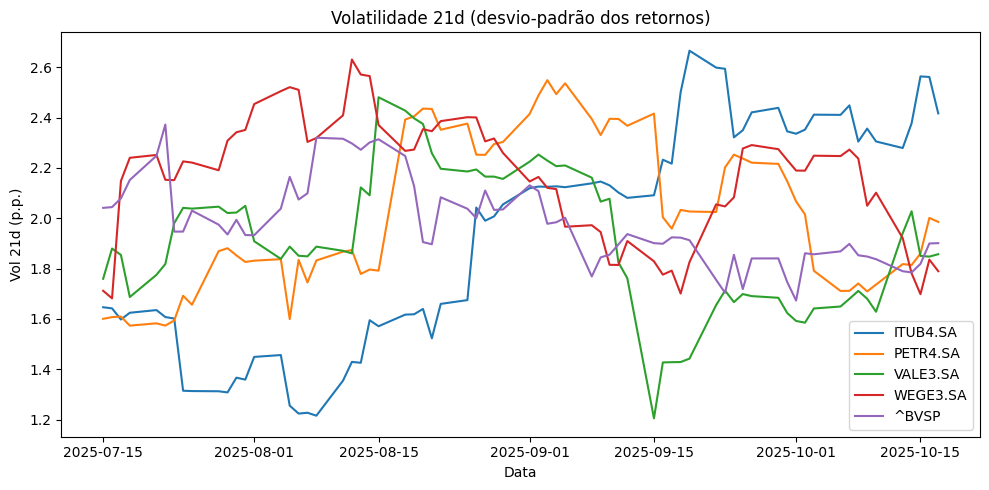

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F, Window

df = spark.table("fato_precos")
w = Window.partitionBy("ticker").orderBy("trade_date")

df_ret = (df
    .withColumn("lag_close", F.lag("close").over(w))
    .withColumn("return_pct", (F.col("close")-F.col("lag_close"))/F.col("lag_close")*100.0)
    .select("trade_date","ticker","return_pct")
)

pdf = (df_ret
       .orderBy("trade_date","ticker")
       .toPandas())

plt.figure(figsize=(10,5))
for t in pdf["ticker"].unique():
    sub = pdf[pdf["ticker"]==t].copy()
    sub["vol21"] = sub["return_pct"].rolling(21).std()
    plt.plot(sub["trade_date"], sub["vol21"], label=t)
plt.title("Volatilidade 21d (desvio-padrão dos retornos)")
plt.xlabel("Data")
plt.ylabel("Vol 21d (p.p.)")
plt.legend()
plt.tight_layout()
plt.show()
